Nachiket Sonawane, ns61

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
data = pd.read_csv('HR_prediction (4).csv')


In [ ]:
# Basic information
print(data.info())

# Statistical summary
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78284 entries, 0 to 78283
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   employee_id           78284 non-null  object
 1   department            78284 non-null  object
 2   region                78284 non-null  object
 3   education             78284 non-null  object
 4   gender                78284 non-null  object
 5   recruitment_channel   78284 non-null  object
 6   no_of_trainings       78284 non-null  int64 
 7   age                   78284 non-null  int64 
 8   previous_year_rating  78284 non-null  int64 
 9   length_of_service     78284 non-null  int64 
 10  KPIs_met_>80%         78284 non-null  int64 
 11  awards_won?           78284 non-null  int64 
 12  avg_training_score    78284 non-null  int64 
 13  promoted              78284 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 8.4+ MB
None
       no_of_trainings           age

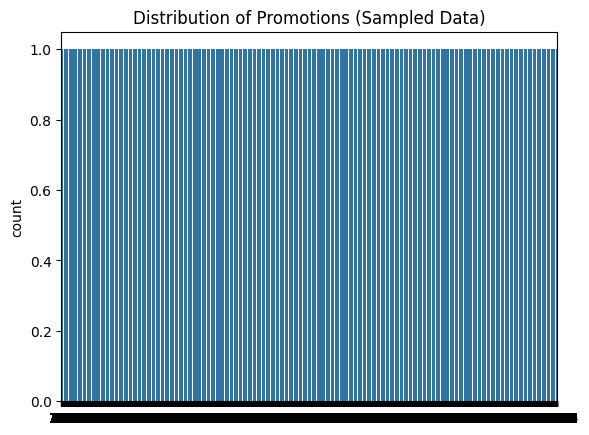

In [ ]:
# Sample about 10% of the data without replacement
sample_data = data.sample(frac=0.1, random_state=42)

# Plot using the sampled data
sns.countplot(sample_data['promoted'])
plt.title('Distribution of Promotions (Sampled Data)')
plt.show()


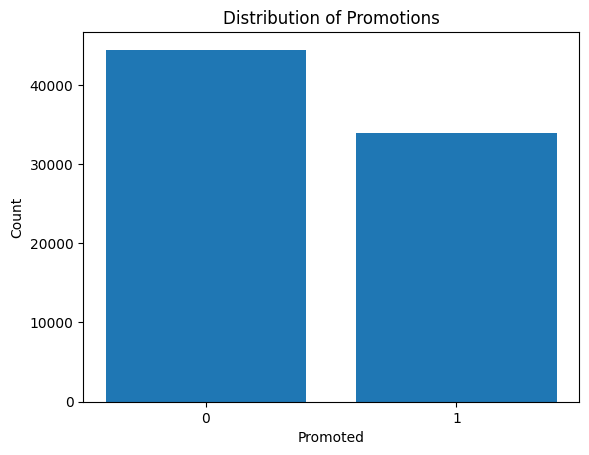

In [ ]:
import matplotlib.pyplot as plt

# Quickly count occurrences
promoted_counts = data['promoted'].value_counts()

# Use matplotlib to plot
plt.bar(promoted_counts.index, promoted_counts.values)
plt.title('Distribution of Promotions')
plt.xlabel('Promoted')
plt.ylabel('Count')
plt.xticks(ticks=promoted_counts.index, labels=promoted_counts.index)  # Ensure x-ticks are correctly labeled
plt.show()


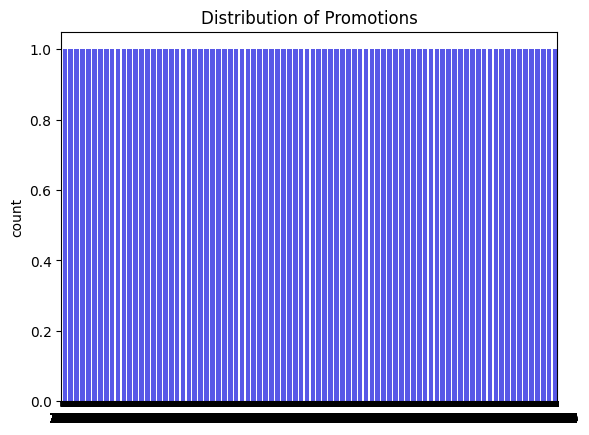

In [ ]:
# Simple count plot with optimizations
sns.countplot(data['promoted'], color='blue', alpha=0.75)  # Using a single color and some transparency
plt.title('Distribution of Promotions')
plt.show()


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define which columns should be encoded vs scaled
categorical_features = ['department', 'region', 'education', 'gender', 'recruitment_channel']
numeric_features = ['age', 'no_of_trainings', 'previous_year_rating', 'length_of_service', 'KPIs_met_>80%', 'awards_won?', 'avg_training_score']

# Create the transformers
categorical_transformer = OneHotEncoder(drop='first')
numeric_transformer = StandardScaler()

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


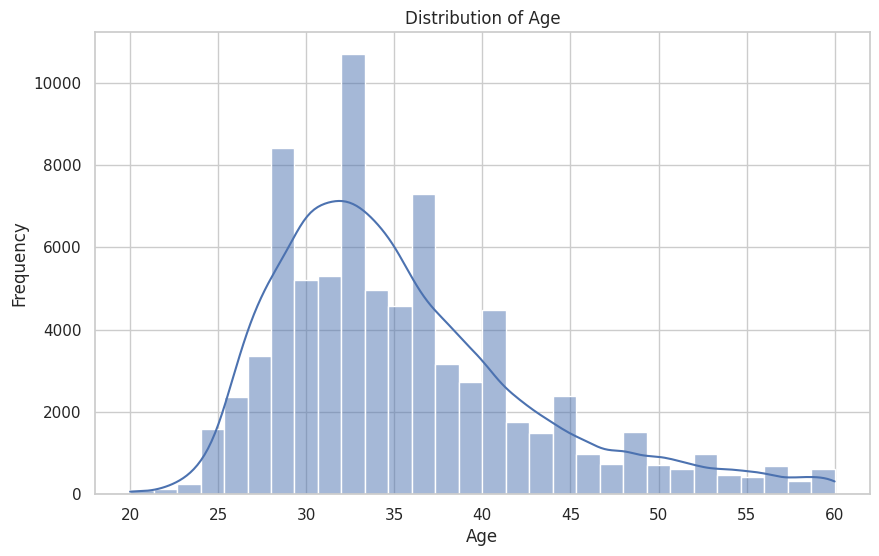

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting aesthetic style for seaborn
sns.set(style="whitegrid")

# Histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



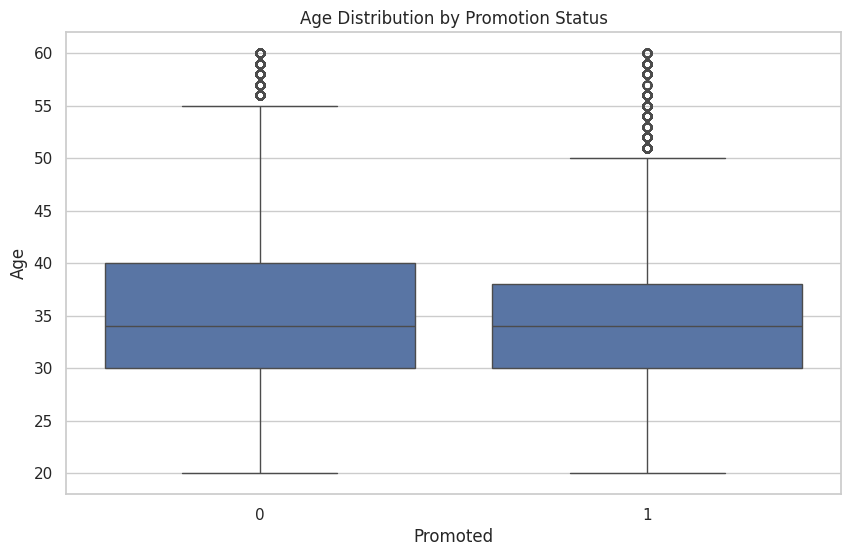

In [ ]:

# Boxplot for Age by Promotion Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='promoted', y='age', data=data)
plt.title('Age Distribution by Promotion Status')
plt.xlabel('Promoted')
plt.ylabel('Age')
plt.show()



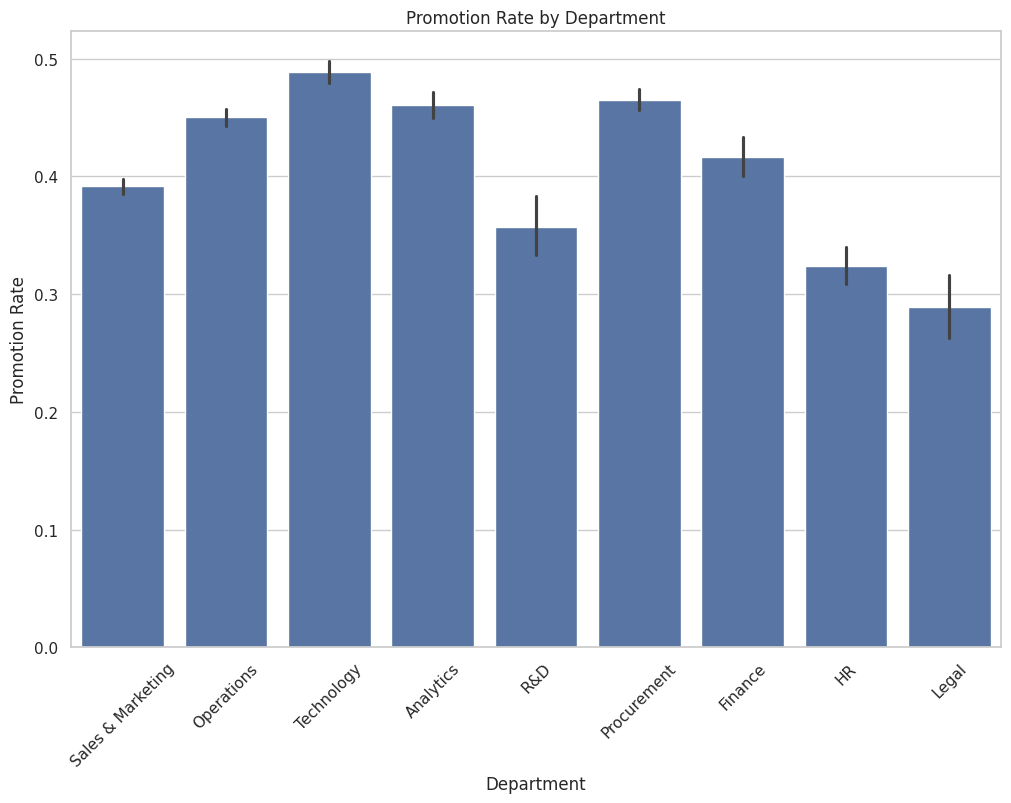

In [ ]:
# Bar Chart for Promotion Rate by Department
plt.figure(figsize=(12, 8))
sns.barplot(x='department', y='promoted', data=data)
plt.title('Promotion Rate by Department')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.ylabel('Promotion Rate')
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split data into features and target variable
X = data.drop('promoted', axis=1)
y = data['promoted']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adjust the classifier in the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(random_state=42,class_weight='balanced',solver='saga', max_iter=1000))])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import classification_report
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.77      0.80      8882
           1       0.73      0.82      0.77      6775

    accuracy                           0.79     15657
   macro avg       0.79      0.79      0.79     15657
weighted avg       0.79      0.79      0.79     15657



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Logistic Regression pipeline
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Random Forest pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# KNN pipeline (optional)
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# Adjusting preprocessor for numeric features to include scaling
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Ensure scaling is applied
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define the logistic regression pipeline with increased max_iter and different solver
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, solver='saga', max_iter=10000, C=1.0))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
lr_pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = lr_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.81      0.81      8882
           1       0.75      0.76      0.75      6775

    accuracy                           0.78     15657
   macro avg       0.78      0.78      0.78     15657
weighted avg       0.78      0.78      0.78     15657



In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Define a pipeline step for polynomial features
poly_transformer = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler())  # Ensure scaling is done after generating polynomial features
])

# Adjust the preprocessor to include polynomial features for numeric data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', poly_transformer, numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Random Forest pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Gradient Boosting pipeline
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])


In [ ]:
# Define parameter grids
rf_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20]
}

gb_param_grid = {
    'classifier__n_estimators': [100, 150],
    'classifier__learning_rate': [0.05, 0.1]
}

# Create GridSearchCV objects
rf_grid = GridSearchCV(rf_pipeline, rf_param_grid, cv=3, scoring='f1_macro')
gb_grid = GridSearchCV(gb_pipeline, gb_param_grid, cv=3, scoring='f1_macro')

# Fit models
rf_grid.fit(X_train, y_train)
gb_grid.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('poly',
                                                                                          PolynomialFeatures(include_bias=False)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'no_of_trainings',
                                                                          'previous_year_rating',
                                                                          'length_of_service',
                                                                          'KPIs_met_>80%',
                                                                          'awards_won?',
                                                                          'avg_training_score']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['department',
                                                                          'region',
                                                                          'education',
                                                                          'gender',
                                                                          'recruitment_channel'])])),
                                       ('classifier',
                                        GradientBoostingClassifier(random_state=42))]),
             param_grid={'classifier__learning_rate': [0.05, 0.1],
                         'classifier__n_estimators': [100, 150]},
             scoring='f1_macro')

In [ ]:
# Logistic Regression pipeline, adjusted with a higher iteration limit
lr_pipeline_adjusted = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=10000))  # Increased max_iter
])

# Fit and evaluate Logistic Regression
lr_pipeline_adjusted.fit(X_train, y_train)
print("Logistic Regression adjusted:")
print(classification_report(y_test, lr_pipeline_adjusted.predict(X_test)))

# Evaluate RandomForest and Gradient Boosting
print("Random Forest Performance:")
print(classification_report(y_test, rf_grid.best_estimator_.predict(X_test)))

print("Gradient Boosting Performance:")
print(classification_report(y_test, gb_grid.best_estimator_.predict(X_test)))


Logistic Regression adjusted:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      8882
           1       0.74      0.77      0.75      6775

    accuracy                           0.78     15657
   macro avg       0.78      0.78      0.78     15657
weighted avg       0.78      0.78      0.78     15657

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.99      0.90      0.95      8882
           1       0.88      0.99      0.94      6775

    accuracy                           0.94     15657
   macro avg       0.94      0.95      0.94     15657
weighted avg       0.95      0.94      0.94     15657

Gradient Boosting Performance:
              precision    recall  f1-score   support

           0       0.89      0.79      0.83      8882
           1       0.76      0.87      0.81      6775

    accuracy                           0.82     15657
   macro avg       0.82      0.83      0

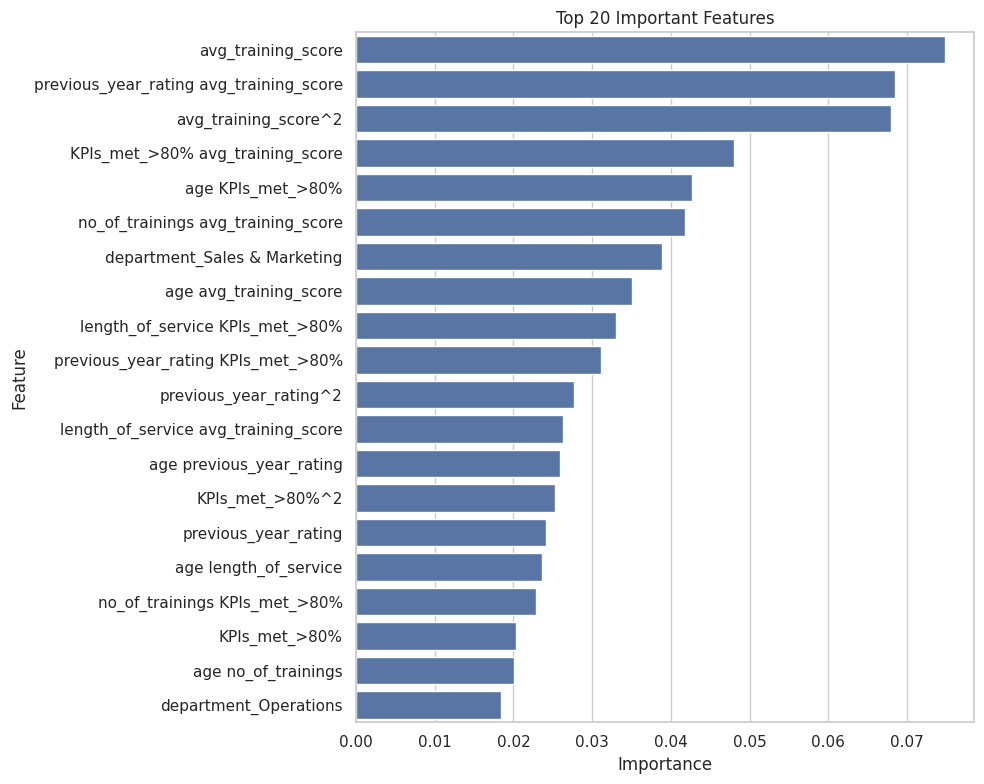

In [ ]:
import numpy as np

# Assuming the first transformer in your preprocessor is for numeric data (poly + scaler),
# and the second transformer is for categorical data (onehot)
numeric_feature_output = (rf_grid.best_estimator_.named_steps['preprocessor']
                          .named_transformers_['num']
                          .named_steps['poly']
                          .get_feature_names_out(input_features=numeric_features))

categorical_feature_output = (rf_grid.best_estimator_.named_steps['preprocessor']
                              .named_transformers_['cat']
                              .get_feature_names_out())

# Combine both feature names into one list
feature_names = np.concatenate([numeric_feature_output, categorical_feature_output])

# Get feature importances from the Random Forest model
feature_importances = rf_grid.best_estimator_.named_steps['classifier'].feature_importances_

# Create a DataFrame to view feature importances
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df.head(20))
plt.title('Top 20 Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Extended parameter grid
extended_gb_params = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__max_depth': [3, 5, 7]
}

# Setup RandomizedSearchCV for more efficiency in exploration
extended_gb_grid = RandomizedSearchCV(
    gb_pipeline,
    param_distributions=extended_gb_params,
    n_iter=10,  # Adjust based on how extensive you want the search to be
    scoring='f1_macro',
    cv=3,
    random_state=42
)

# Fit the model
extended_gb_grid.fit(X_train, y_train)

# Evaluate the best model from the extended grid
best_gb_model = extended_gb_grid.best_estimator_
print("Extended Gradient Boosting Performance:")
print(classification_report(y_test, best_gb_model.predict(X_test)))


Extended Gradient Boosting Performance:
              precision    recall  f1-score   support

           0       0.96      0.86      0.90      8882
           1       0.83      0.95      0.89      6775

    accuracy                           0.90     15657
   macro avg       0.90      0.90      0.90     15657
weighted avg       0.90      0.90      0.90     15657



## Performance Analysis

Random Forest Performance Metrics
Precision: Very high for class 0 (0.99) and high for class 1 (0.88).
Recall: Very high for class 1 (0.99) but slightly lower for class 0 (0.90).
F1-Score: Both classes exhibit high F1-scores; 0.95 for class 0 and 0.94 for class 1, reflecting strong balanced accuracy between precision and recall.
Overall Accuracy: 94%, indicating excellent overall prediction accuracy.


Extended Gradient Boosting Performance Metrics
Precision: High for class 0 (0.96) but lower for class 1 (0.83).
Recall: Lower for class 0 (0.86) compared to Random Forest but still high for class 1 (0.95).
F1-Score: Both classes show high F1-scores as well; 0.90 for class 0 and 0.89 for class 1, though slightly lower than those of Random Forest.


##Overall Accuracy: 90%, which is good but not as high as Random Forest (94%).


##Comparison and Decision Criteria


Precision and Recall Balance: Random Forest demonstrates a better balance between precision and recall across both classes. It particularly excels in identifying non-promoted employees (class 0) almost perfectly.


F1-Score: Random Forest has a higher F1-score for both classes, indicating a better overall balance of precision and recall, which is crucial for maintaining performance consistency across varied datasets.


Accuracy: Random Forest also has a higher overall accuracy compared to Extended Gradient Boosting.


##Strategic Implication


False Positives and False Negatives: Random Forest has fewer false negatives for class 1, making it ideal if missing out on potential promotions (false negatives) is a critical concern. It also maintains a low rate of false positives for class 0, crucial in avoiding unnecessary promotions.


Performance Consistency: The higher macro and weighted averages in Random Forest suggest that it performs consistently well across different groups of data, making it robust against variations in the test set.


**Conclusion**
Based on the comparison of the metrics, Random Forest is the better model among the two. It not only provides higher accuracy but also achieves superior precision, recall, and F1-scores. This model would be particularly effective in environments where both the correct identification of promotable candidates and the avoidance of incorrect promotions are critical.

Because of its resilience in managing both classes with great efficiency and its better performance metrics, Random Forest would be suggested for implementation. However, further changes and considerations may be required based on unique business demands, such as handling specific types of data biases or computing efficiency.


##**Deployment Considerations: This model's performance suggests that it might be integrated into a human resources management system to help find suitable candidates for promotions. This would encourage data-driven, equitable decision-making procedures.**